In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Load the the original image
original = cv2.imread('../img/2.jpg', 0)

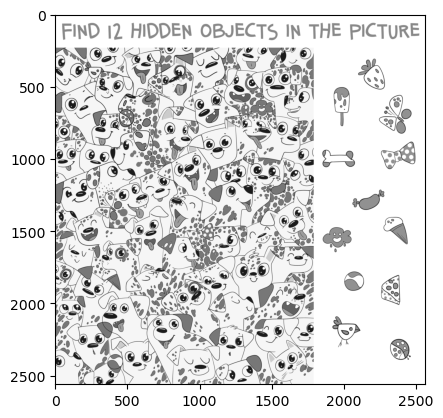

In [3]:
# Show the original image
plt.imshow(original, cmap='gray')

In [4]:
# Create a list to store object images
objects = []

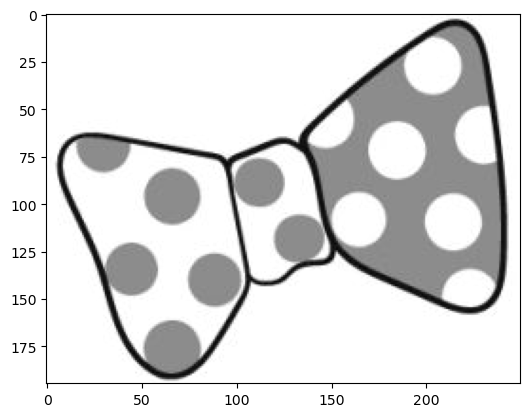

In [5]:
# Take the tie
tie = original[880:1075, 2250:2500]
# Show image of balloon
plt.imshow(tie, cmap='gray')
# Add the tie to the list
objects.append(tie)

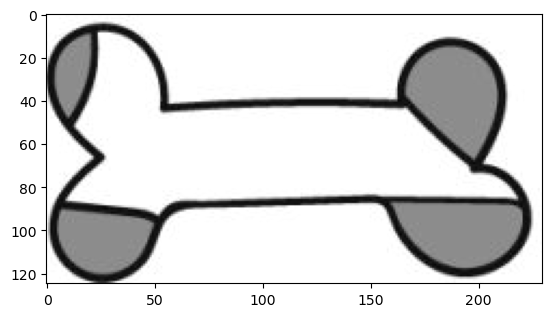

In [6]:
# Take the bone image 
bone = original[935:1060, 1850:2080]
# Show image of bone
plt.imshow(bone, cmap='gray')
# Add the bone to the list
objects.append(bone)

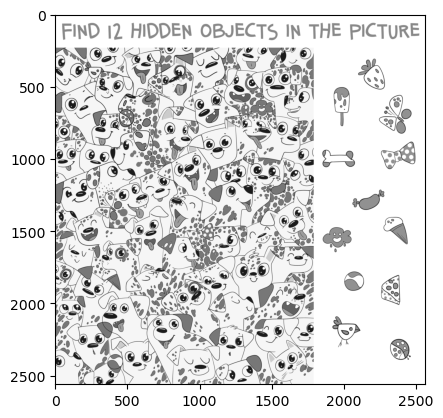

In [7]:
# Print the original image
plt.imshow(original, cmap='gray')

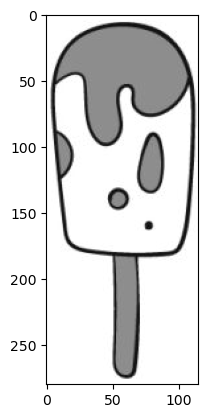

In [8]:
# Take the cream image
cream = original[500:780, 1925:2040]
# Show image of cream
plt.imshow(cream, cmap='gray')
# Add the cream to the list
objects.append(cream)

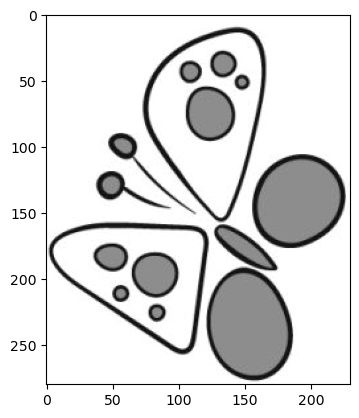

In [9]:
# Take the butterfly image
butterfly = original[550:830, 2240:2470]
# Show image of butterfly
plt.imshow(butterfly, cmap='gray')
# Add the butterfly to the list
objects.append(butterfly)

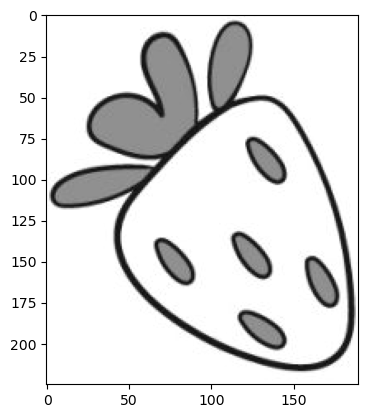

In [10]:
# Take the strawberry image
strawberry = original[305:530, 2095:2285]
# Show image of strawberry
plt.imshow(strawberry, cmap='gray')
# Add the strawberry to the list
objects.append(strawberry)

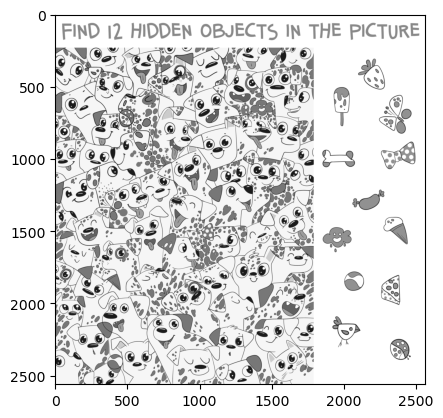

In [11]:
# Show the original image
plt.imshow(original, cmap='gray')

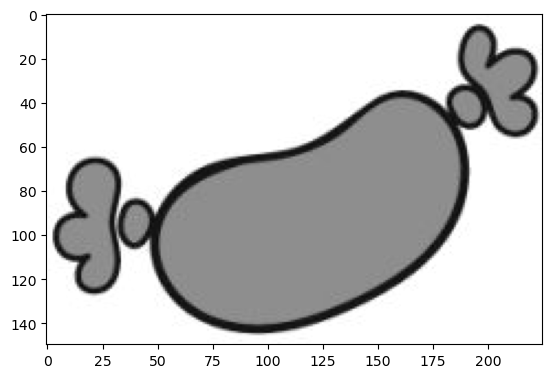

In [12]:
# Take the sausage image
sausage = original[1210:1360, 2055:2280]
# Show image of sausage
plt.imshow(sausage, cmap='gray')
# Add the sausage to the list
objects.append(sausage)

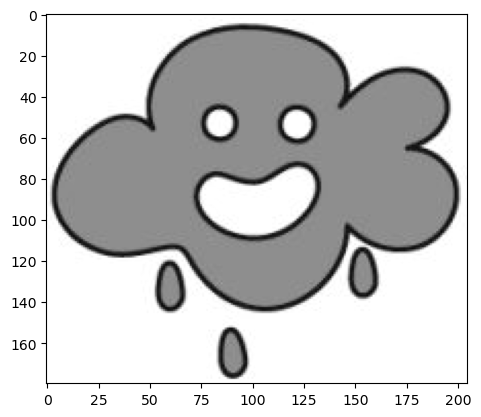

In [13]:
# Take the cloud image
cloud = original[1470:1650, 1850:2055]
# Show image of cloud
plt.imshow(cloud, cmap='gray')
# Add the cloud to the list
objects.append(cloud)

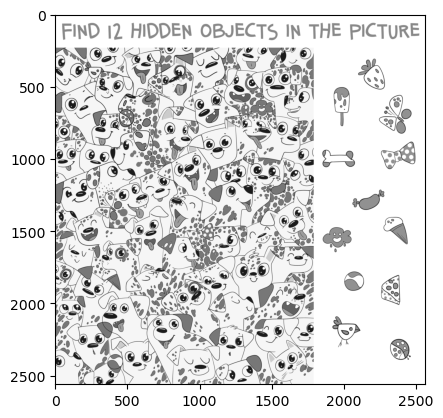

In [14]:
plt.imshow(original, cmap='gray')

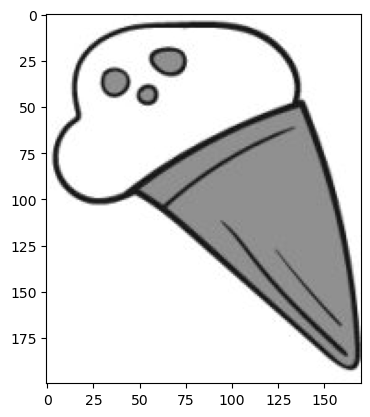

In [15]:
# Take the cream2 image
cream2 = original[1400:1600, 2270:2440]
# Show image of cream2
plt.imshow(cream2, cmap='gray')
# Add the cream2 to the list
objects.append(cream2)

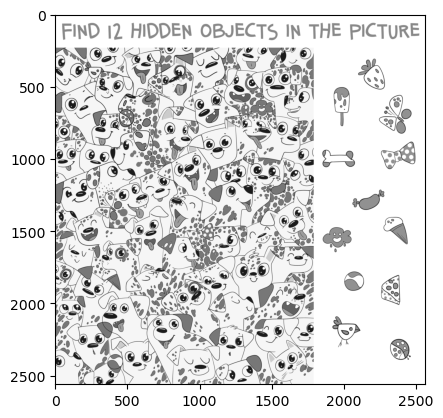

In [16]:
# Show the original image
plt.imshow(original, cmap='gray')

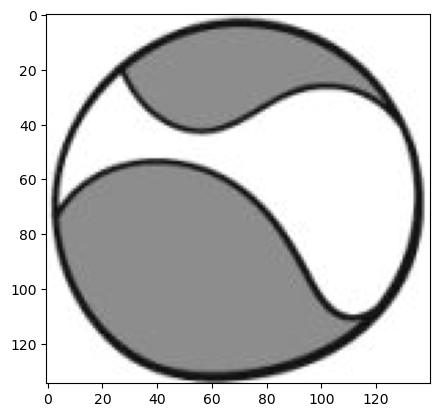

In [17]:
# Take the ball image
ball = original[1780:1915, 2000:2140]
# Show image of ball
plt.imshow(ball, cmap='gray')
# Add the ball to the list
objects.append(ball)

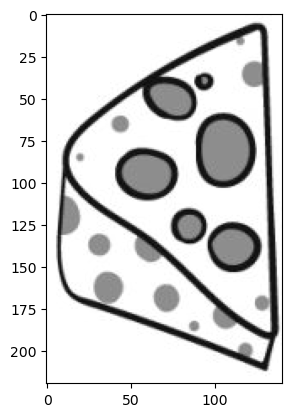

In [18]:
# Take the cheese image
cheese = original[1800:2020, 2250:2390]
# Show image of cheese
plt.imshow(cheese, cmap='gray')
# Add the cheese to the list
objects.append(cheese)

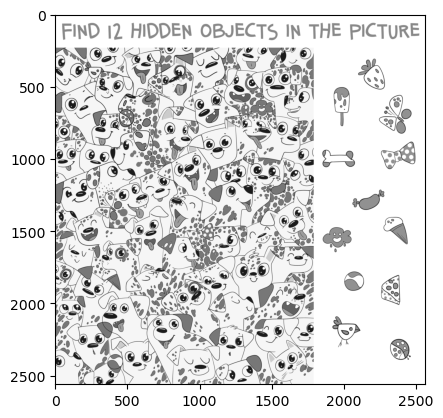

In [19]:
# Show the original image
plt.imshow(original, cmap='gray')

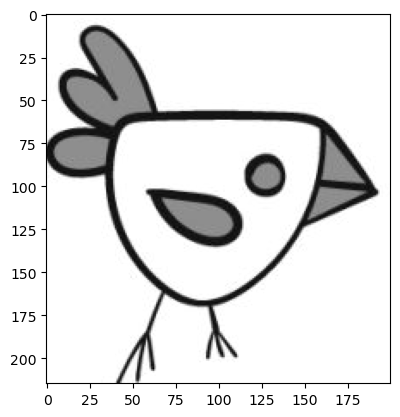

In [20]:
# Take the bird image
bird = original[2085:2300, 1920:2120]
# Show image of bird
plt.imshow(bird, cmap='gray')
# Add the bird to the list
objects.append(bird)

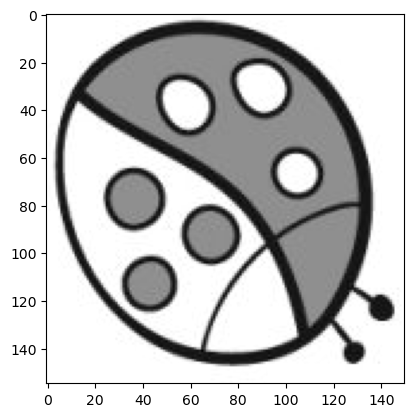

In [21]:
# Take the insert image
insert = original[2245:2400, 2315:2465]
# Show image of insert
plt.imshow(insert, cmap='gray')
# Add the insert to the list
objects.append(insert)

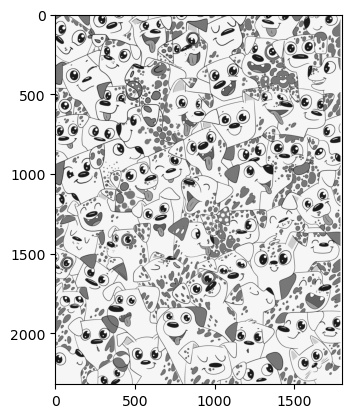

In [22]:
# Take the target image 
target = original[240:original.shape[0], 0:1800]
# Show the target image
plt.imshow(target, cmap='gray')

In [23]:
def edge_detection(image):
    # Apply Gaussian blur with a larger kernel
    blur = cv2.GaussianBlur(image, (7, 7), 0)
    
    # Apply Canny edge detection with lower thresholds
    edges = cv2.Canny(blur, 0, 50)
    
    # Apply dilation to connect broken edges
    kernel = np.ones((3, 3), np.uint8)
    edges = cv2.dilate(edges, kernel, iterations=1)
    
    return edges

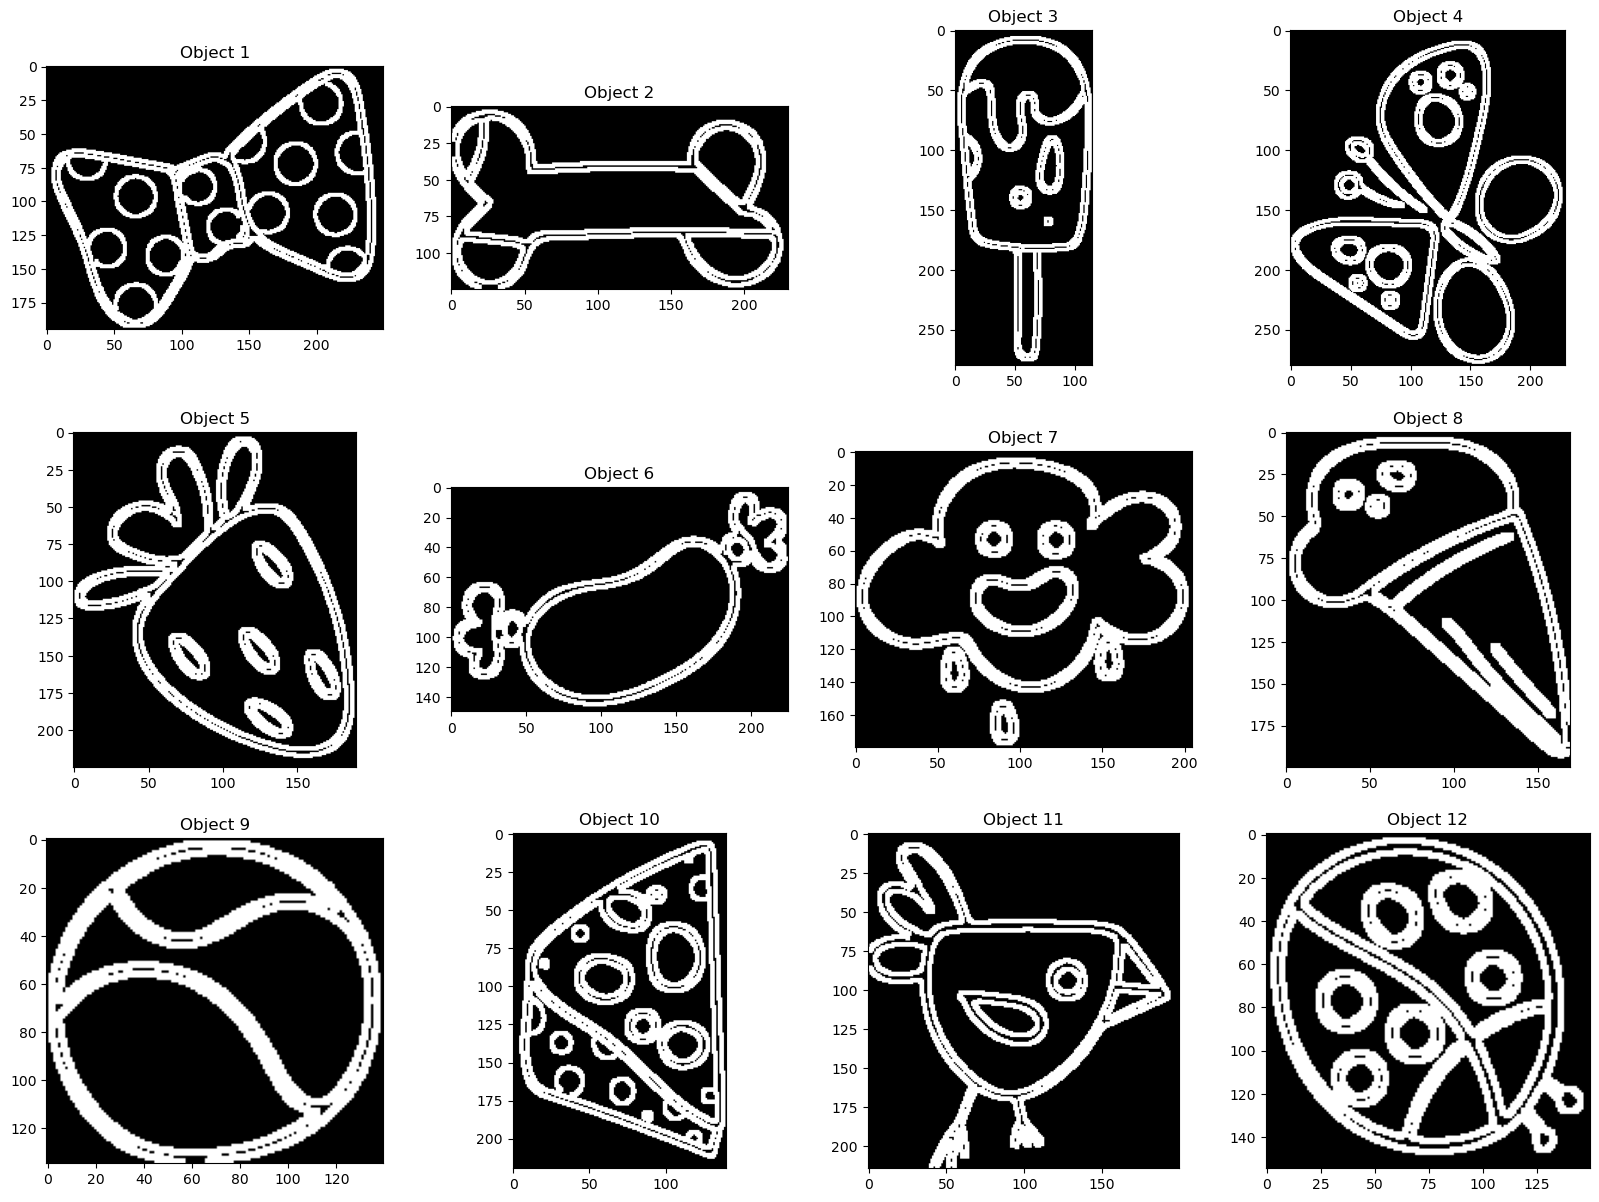

In [24]:
# Apply edge detection to object images
edges = []
for obj in objects:
    edges.append(edge_detection(obj))

# Show the objects edge detection results by subplot
plt.figure(figsize=(20, 20))
for i in range(len(objects)):
    plt.subplot(4, 4, i+1)
    plt.imshow(edges[i], cmap='gray')
    plt.title('Object ' + str(i+1))
plt.show()


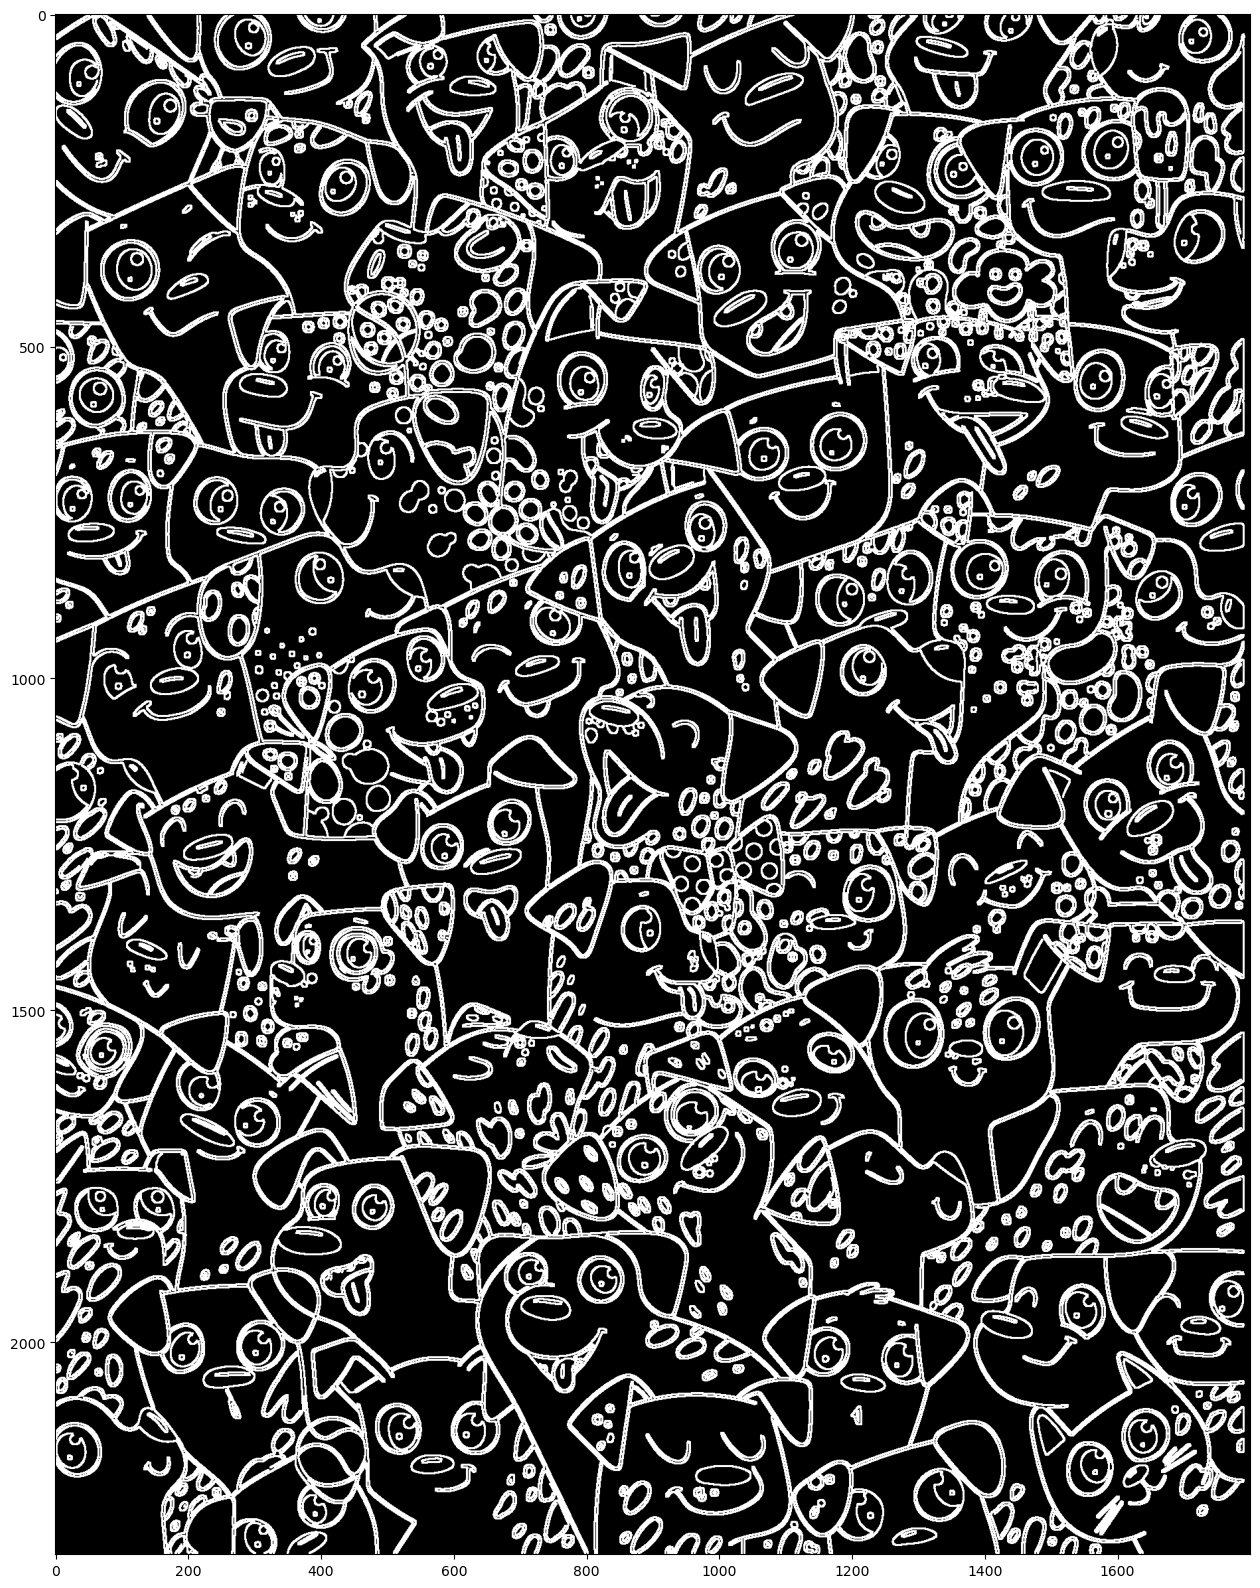

In [25]:
# Apply edge detection to the target image
target_edges = edge_detection(target)
# Show the target edge detection result with a bigger size
plt.figure(figsize=(20, 20))
plt.imshow(target_edges, cmap='gray', )

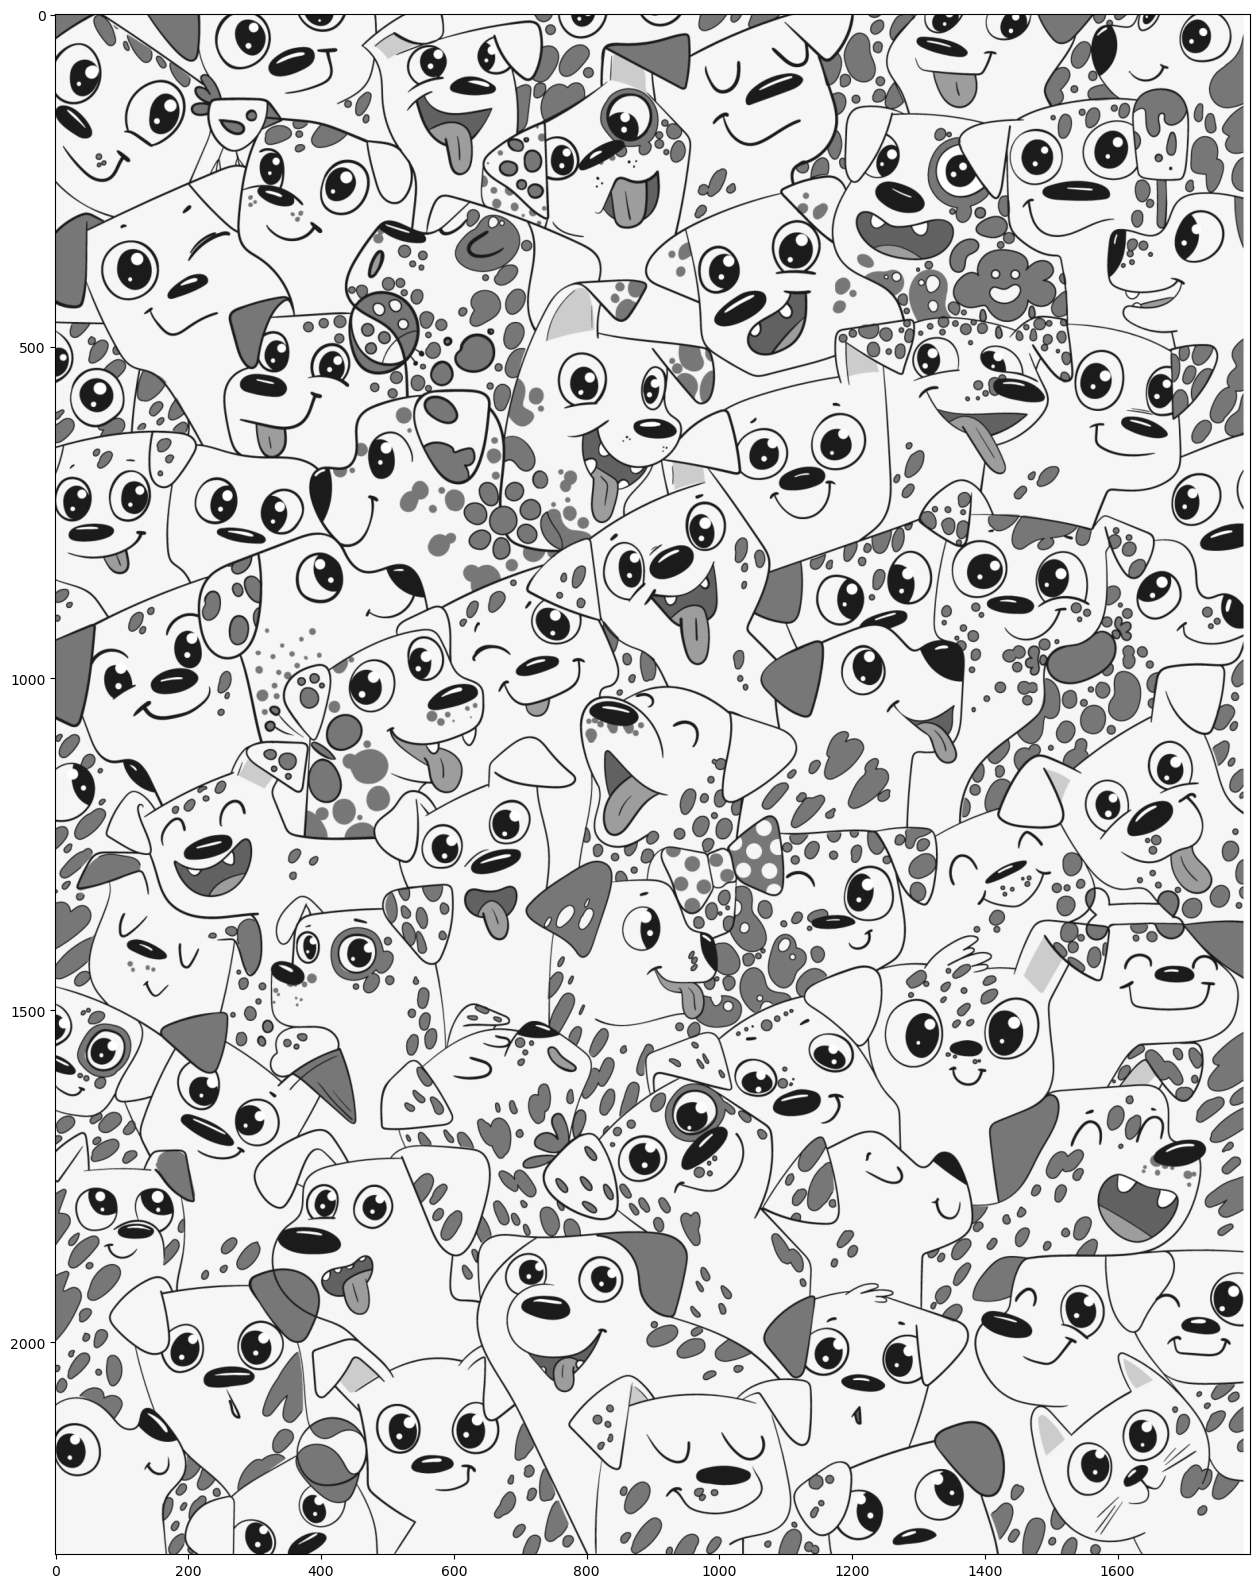

In [26]:
# Show the target image
plt.figure(figsize=(20, 20))
plt.imshow(target, cmap='gray')

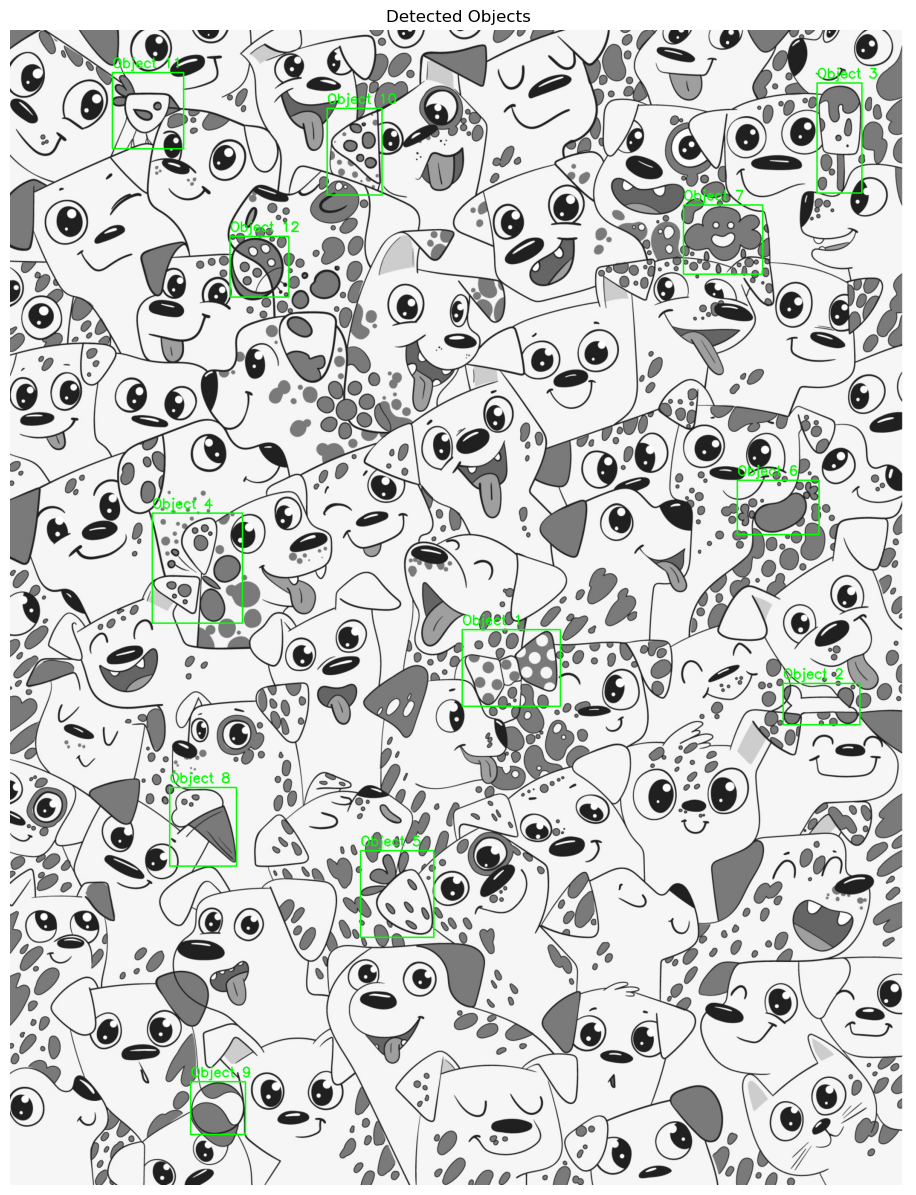

In [27]:


def improved_template_matching(target, template, threshold=0.5):
    best_match = None
    best_score = -np.inf
    best_scale = 1.0
    
    for scale in np.linspace(0.2, 1.7, 100):
        resized_template = cv2.resize(template, None, fx=scale, fy=scale, interpolation=cv2.INTER_AREA)
        
        if resized_template.shape[0] > target.shape[0] or resized_template.shape[1] > target.shape[1]:
            continue
        
        res = cv2.matchTemplate(target, resized_template, cv2.TM_CCOEFF_NORMED)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        
        if max_val > best_score:
            best_score = max_val
            best_match = max_loc
            best_scale = scale
    
    if best_score >= threshold:
        return best_match, best_scale
    else:
        return None, None

def find_objects(target, objects, threshold=0.4):
    target_edges = edge_detection(target)
    results = []
    
    for i, obj in enumerate(objects):
        obj_edges = edge_detection(obj)
        location, scale = improved_template_matching(target_edges, obj_edges, threshold)
        
        if location is not None:
            results.append((i, location, scale))
    
    return results

def draw_results(target, objects, results):
    target_copy = target.copy()
    target_copy = cv2.cvtColor(target_copy, cv2.COLOR_GRAY2RGB)
    
    for i, location, scale in results:
        obj = objects[i]
        w, h = int(obj.shape[1] * scale), int(obj.shape[0] * scale)
        x, y = location
        cv2.rectangle(target_copy, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(target_copy, f'Object {i+1}', (x, y-10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)
    
    return target_copy

# Assuming 'original', 'target', and 'objects' are already defined
results = find_objects(target, objects)
result_image = draw_results(target, objects, results)

plt.figure(figsize=(15, 15))
plt.imshow(result_image)
plt.title('Detected Objects')
plt.axis('off')
plt.show()